In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("C:/Users/Dell/Desktop/Aniket Resume/Oniline Resume/Data Science/Finance-Chatbot-Project(BCGX)/Finnace-chatbot-project(BCGX).csv")

In [5]:
df.head(5)

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Ops
0,Microsoft,2023,211915,72361,395433,198298,87604
1,Microsoft,2022,198270,61271,364840,191791,89034
2,Microsoft,2021,168088,61271,333779,183007,76737
3,Tesla,2023,96773,14997,106618,41743,13256
4,Tesla,2022,81462,12556,82338,35465,14724


In [8]:
# Sort data by Company and Fiscal Year (ascending)
df_sorted = df.sort_values(by=['Company', 'Fiscal Year'])

# Calculate percentage changes for each company
df_sorted['Revenue Growth (%)'] = df_sorted.groupby('Company')['Total Revenue'].pct_change() * 100
df_sorted['Net Income Growth (%)'] = df_sorted.groupby('Company')['Net Income'].pct_change() * 100

df_sorted.reset_index(drop=True, inplace=True)
df_sorted.head(10)


,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Ops,Revenue Growth (%),Net Income Growth (%)
0,Apple,2021,365817,86898,351002,287912,104038,NaN,NaN
1,Apple,2022,394328,99803,351002,302083,122151,7.793788,14.850745
2,Apple,2023,383285,96995,352583,302083,110543,-2.800461,-2.813543
3,Microsoft,2021,168088,61271,333779,183007,76737,NaN,NaN
4,Microsoft,2022,198270,61271,364840,191791,89034,17.956071,0.000000
5,Microsoft,2023,211915,72361,395433,198298,87604,6.882030,18.099917
6,Tesla,2021,53823,5519,62131,28672,11497,NaN,NaN
7,Tesla,2022,81462,12556,82338,35465,14724,51.351653,127.504983
8,Tesla,2023,96773,14997,106618,41743,13256,18.795267,19.440905


In [16]:
# filled the null values.
df.fillna(0,inplace=True)

In [17]:
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Ops,Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2023,211915,72361,395433,198298,87604,0.000000,0.000000
1,Microsoft,2022,198270,61271,364840,191791,89034,-6.438902,-15.325935
2,Microsoft,2021,168088,61271,333779,183007,76737,-15.222676,0.000000
3,Tesla,2023,96773,14997,106618,41743,13256,0.000000,0.000000
4,Tesla,2022,81462,12556,82338,35465,14724,-15.821562,-16.276589
5,Tesla,2021,53823,5519,62131,28672,11497,-33.928703,-56.044919
6,Apple,2023,383285,96995,352583,302083,110543,0.000000,0.000000
7,Apple,2022,394328,99803,351002,302083,122151,2.881146,2.894995
8,Apple,2021,365817,86898,351002,287912,104038,-7.230275,-12.930473


#  Average Revenue, Net Income, and Cash Flow per Company

In [18]:
avg_metrics = df_sorted.groupby("Company")[["Total Revenue", "Net Income", "Cash Flow from Ops"]].mean().round(2)
print("Average Metrics per Company:")
avg_metrics


Average Metrics per Company:


,Total Revenue,Net Income,Cash Flow from Ops
Company,,,
Apple,381143.33,94565.33,112244.00
Microsoft,192757.67,64967.67,84458.33
Tesla,77352.67,11024.00,13159.00


# Assets vs Liabilities Over Time

In [19]:
assets_liabilities = df_sorted.groupby(["Company", "Fiscal Year"])[["Total Assets", "Total Liabilities"]].sum()
print("Assets vs Liabilities:")
assets_liabilities

Assets vs Liabilities:


Total Assets  Total Liabilities
Company   Fiscal Year                                 
Apple     2021               351002             287912
          2022               351002             302083
          2023               352583             302083
Microsoft 2021               333779             183007
          2022               364840             191791
          2023               395433             198298
Tesla     2021                62131              28672
          2022                82338              35465
          2023               106618              41743

#  Cash Flow Trend Over Years (Visualized)

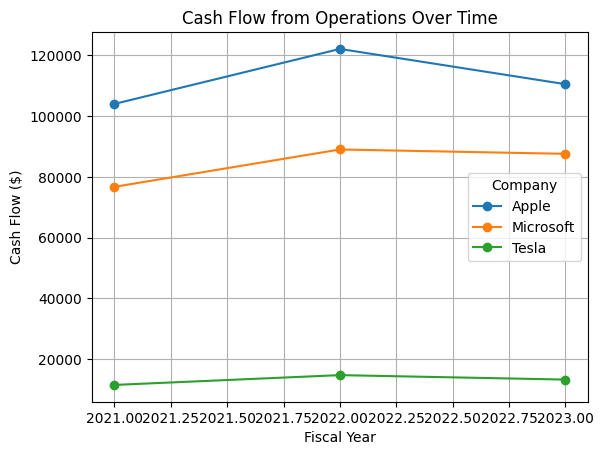

In [20]:
import matplotlib.pyplot as plt

cash_flow_trend = df_sorted.pivot(index="Fiscal Year", columns="Company", values="Cash Flow from Ops")
cash_flow_trend.plot(kind='line', marker='o', title="Cash Flow from Operations Over Time")
plt.ylabel("Cash Flow ($)")
plt.grid(True)
plt.show()
